In [1]:
import h5py
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import yaml

plt.rcParams["figure.dpi"] = 200
# reduced for quick viewing
# plt.rcParams["figure.dpi"] = 400
plt.rcParams["text.usetex"] = False
# disabled due to missing font in the texlive on the Nikhef clusters
# plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.constrained_layout.use"] = True

In [2]:
hdf_dir = "/data/atlas/users/slin/myHepattn/hepattn/src/hepattn/experiments/trackml/logs/TRK-v0-full_20250906-T205842/ckpts/epoch=029-val_loss=50.09092_test_eval.h5"

In [3]:
f = h5py.File(hdf_dir, "r")
for key in f.keys():
    print("Key: %s  \tType: %s" % (key, type(f[key])))

Key: 29800  	Type: <class 'h5py._hl.group.Group'>
Key: 29801  	Type: <class 'h5py._hl.group.Group'>
Key: 29802  	Type: <class 'h5py._hl.group.Group'>
Key: 29803  	Type: <class 'h5py._hl.group.Group'>
Key: 29804  	Type: <class 'h5py._hl.group.Group'>
Key: 29805  	Type: <class 'h5py._hl.group.Group'>
Key: 29806  	Type: <class 'h5py._hl.group.Group'>
Key: 29807  	Type: <class 'h5py._hl.group.Group'>
Key: 29808  	Type: <class 'h5py._hl.group.Group'>
Key: 29809  	Type: <class 'h5py._hl.group.Group'>
Key: 29810  	Type: <class 'h5py._hl.group.Group'>
Key: 29811  	Type: <class 'h5py._hl.group.Group'>
Key: 29812  	Type: <class 'h5py._hl.group.Group'>
Key: 29813  	Type: <class 'h5py._hl.group.Group'>
Key: 29814  	Type: <class 'h5py._hl.group.Group'>
Key: 29815  	Type: <class 'h5py._hl.group.Group'>
Key: 29816  	Type: <class 'h5py._hl.group.Group'>
Key: 29817  	Type: <class 'h5py._hl.group.Group'>
Key: 29818  	Type: <class 'h5py._hl.group.Group'>
Key: 29819  	Type: <class 'h5py._hl.group.Group'>


In [4]:
group_key = list(f.keys())[2]
k = list(f[group_key])
for j in k:
    print(j)
    print("\t", f[group_key][j].keys())

inputs
	 <KeysViewHDF5 ['hit_charge_frac', 'hit_eta', 'hit_geta', 'hit_gphi', 'hit_leta', 'hit_lphi', 'hit_lx', 'hit_ly', 'hit_lz', 'hit_phi', 'hit_r', 'hit_s', 'hit_u', 'hit_v', 'hit_valid', 'hit_x', 'hit_y', 'hit_z']>
outputs
	 <KeysViewHDF5 ['final']>
preds
	 <KeysViewHDF5 ['final']>
targets
	 <KeysViewHDF5 ['hit_on_valid_particle', 'hit_valid', 'particle_eta', 'particle_hit_valid', 'particle_phi', 'particle_pt', 'particle_px', 'particle_py', 'particle_pz', 'particle_valid', 'particle_vz', 'sample_id']>


# Evaluation file structure

## `inputs` group

In [5]:
print("\ninputs")
print("\t", list(f[group_key]["inputs"]))

print("\n============================")

print("\ninputs/hit_eta")
print("\t", list(f[group_key]["inputs"]["hit_eta"]))


inputs
	 ['hit_charge_frac', 'hit_eta', 'hit_geta', 'hit_gphi', 'hit_leta', 'hit_lphi', 'hit_lx', 'hit_ly', 'hit_lz', 'hit_phi', 'hit_r', 'hit_s', 'hit_u', 'hit_v', 'hit_valid', 'hit_x', 'hit_y', 'hit_z']


inputs/hit_eta
	 [array([-3.783, -3.86 , -3.941, ...,  4.01 ,  2.87 ,  2.908],
      shape=(11368,), dtype=float16)]


## `outputs` group

In [6]:
print("\noutputs/final/")
print("\t", list(f[group_key]["outputs"]["final"]))

print("\n============================")

print("\noutputs/final/track_hit_valid/")
print("\t", list(f[group_key]["outputs"]["final"]["track_hit_valid"]))
print("\noutputs/final/track_hit_valid/track_hit_logit")
print("\t", list(f[group_key]["outputs"]["final"]["track_hit_valid"]["track_hit_logit"]))

if "track_regr" in list(f[group_key]["outputs"]["final"]):
    print("\n============================")

    print("\noutputs/final/track_regr/")
    print("\t", list(f[group_key]["outputs"]["final"]["track_regr"]))
    print("\noutputs/final/track_regr/track_regr")
    print("\t", list(f[group_key]["outputs"]["final"]["track_regr"]["track_regr"]))

print("\n============================")

print("\noutputs/final/track_valid/")
print("\t", list(f[group_key]["outputs"]["final"]["track_valid"]))
print("\noutputs/final/track_hit_valid/track_hit_logit")
print("\t", list(f[group_key]["outputs"]["final"]["track_valid"]["track_logit"]))


outputs/final/
	 ['track_hit_valid', 'track_regr', 'track_valid']


outputs/final/track_hit_valid/
	 ['track_hit_logit']

outputs/final/track_hit_valid/track_hit_logit
	 [array([[ -28.62 ,  -33.75 ,  -35.25 , ...,  -40.75 ,  -39.   ,  -37.5  ],
       [-145.   , -191.   , -191.   , ..., -189.   , -189.   , -172.   ],
       [ -97.5  , -127.5  , -142.   , ..., -143.   , -183.   , -170.   ],
       ...,
       [ -23.75 ,  -36.75 ,  -31.88 , ...,  -27.5  ,  -24.12 ,  -27.12 ],
       [ -47.25 ,  -70.   ,  -55.   , ...,  -48.25 ,  -49.5  ,  -43.25 ],
       [  -8.5  ,  -11.06 ,  -12.875, ...,  -17.5  ,  -17.5  ,  -16.12 ]],
      shape=(2200, 11368), dtype=float16)]


outputs/final/track_regr/
	 ['track_regr']

outputs/final/track_regr/track_regr
	 [array([[ 1.578e+00,  3.113e-02, -7.500e-01, -3.275e+01],
       [ 6.289e-01,  1.297e+00,  1.725e+01, -4.425e+01],
       [ 1.180e+00,  8.828e-01,  5.625e+00, -3.425e+01],
       ...,
       [-1.523e+00,  2.832e-01, -2.891e-01, -3.300e+01],
   

## `preds` group

In [7]:
print("\npreds/final/")
print("\t", list(f[group_key]["preds"]["final"]))
print("\n============================")

print("\npreds/final/track_hit_valid/")
print("\t", list(f[group_key]["preds"]["final"]["track_hit_valid"]))
print("\npreds/final/track_hit_valid/track_hit_valid")
print("\t", list(f[group_key]["preds"]["final"]["track_hit_valid"]["track_hit_valid"]))

if "track_regr" in list(f[group_key]["preds"]["final"]):
    print("\n============================")

    print("\npreds/final/track_regr/")
    print("\t", list(f[group_key]["preds"]["final"]["track_regr"]))
    print("\npreds/final/track_regr/track_px")
    print("\t", list(f[group_key]["preds"]["final"]["track_regr"]["track_px"]))
    print("\npreds/final/track_regr/track_py")
    print("\t", list(f[group_key]["preds"]["final"]["track_regr"]["track_py"]))
    print("\npreds/final/track_regr/track_pz")
    print("\t", list(f[group_key]["preds"]["final"]["track_regr"]["track_pz"]))
    print("\npreds/final/track_regr/track_vx")
    print("\t", list(f[group_key]["preds"]["final"]["track_regr"]["track_vz"]))

print("\n============================")

print("\npreds/final/track_valid/")
print("\t", list(f[group_key]["preds"]["final"]["track_valid"]))
print("\npreds/final/track_valid/track_valid")
print("\t", list(f[group_key]["preds"]["final"]["track_valid"]["track_valid"]))


preds/final/
	 ['track_hit_valid', 'track_regr', 'track_valid']


preds/final/track_hit_valid/
	 ['track_hit_valid']

preds/final/track_hit_valid/track_hit_valid
	 [array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(2200, 11368))]


preds/final/track_regr/
	 ['track_px', 'track_py', 'track_pz', 'track_vz']

preds/final/track_regr/track_px
	 [array([ 1.578 ,  0.629 ,  1.18  , ..., -1.523 , -1.258 , -0.6055],
      shape=(2200,), dtype=float16)]

preds/final/track_regr/track_py
	 [array([ 0.03113,  1.297  ,  0.883  , ...,  0.2832 ,  0.5117 , -0.715  ],
      shape=(2200,), dtype=float16)]

preds/final/track_regr/track_pz
	 [array([-0.75 , 17.25 ,  5.625, ..., -0.289, -2.328, -5.53 

## `targets` group

In [8]:
print("\ntargets/")
print("\t", list(f[group_key]["targets"]))

print("\n============================")

print("\ntargets/hit_on_valid_particle")
print("\t", list(f[group_key]["targets"]["hit_on_valid_particle"]))
print("\ntargets/hit_valid")
print("\t", list(f[group_key]["targets"]["hit_valid"]))
print("\ntargets/particle_eta")
print("\t", list(f[group_key]["targets"]["particle_eta"]))
print("\ntargets/particle_px")
print("\t", list(f[group_key]["targets"]["particle_pt"]))
print("\ntargets/particle_hit_valid")
print("\t", list(f[group_key]["targets"]["particle_hit_valid"]))
print("\ntargets/particle_valid")
print("\t", list(f[group_key]["targets"]["particle_valid"]))


targets/
	 ['hit_on_valid_particle', 'hit_valid', 'particle_eta', 'particle_hit_valid', 'particle_phi', 'particle_pt', 'particle_px', 'particle_py', 'particle_pz', 'particle_valid', 'particle_vz', 'sample_id']


targets/hit_on_valid_particle
	 [array([ True,  True,  True, ...,  True,  True,  True], shape=(11368,))]

targets/hit_valid
	 [array([ True,  True,  True, ...,  True,  True,  True], shape=(11368,))]

targets/particle_eta
	 [array([-0.47555587,  3.339603  ,  2.2312822 , ...,         nan,
               nan,         nan], shape=(2200,), dtype=float32)]

targets/particle_px
	 [array([2.3445141 , 0.90341383, 1.0691355 , ...,        nan,        nan,
              nan], shape=(2200,), dtype=float32)]

targets/particle_hit_valid
	 [array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False

# Tracking model evaluation

## Plot parameters

In [9]:
training_colours = {
    "600 MeV": "mediumvioletred",
    "750 MeV": "cornflowerblue",
    # "1 GeV": "mediumseagreen",  # |eta| < 2.5
    "0.9 GeV": "mediumseagreen",  # |eta| < 4.0
}

qty_bins = {
    "pt": np.array([0.6, 0.75, 1.0, 1.5, 2, 3, 4, 6, 10]),
    # "eta": np.array([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]),
    "eta": np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]),
    "phi": np.array([-3.14, -2.36, -1.57, -0.79, 0, 0.79, 1.57, 2.36, 3.14]),
    "vz": np.array([-100, -50, -20, -10, 0, 10, 20, 50, 100]),
}

qty_symbols = {"pt": "p_\\mathrm{T}", "eta": "\\eta", "phi": "\\phi", "vz": "v_z"}
qty_units = {"pt": "[GeV]", "eta": "", "phi": "", "vz": "[mm]"}

## Retrieve tracking model configuration

In [10]:
with open("/data/atlas/users/slin/myHepattn/hepattn/src/hepattn/experiments/trackml/configs/tracking.yaml", "r") as f:
    fconfig= yaml.safe_load(f)

tracking_params = ["particle_min_pt", "particle_max_abs_eta"]

print("name: "+fconfig["name"])
for i in tracking_params:
    print("> "+i+"\t: ", fconfig["data"][i])
    
tracking_configs = {
    "0.9 GeV": fconfig
}

tracking_fnames = {
    "0.9 GeV": "/data/atlas/users/slin/myHepattn/hepattn/src/hepattn/experiments/trackml/logs/TRK-v0-full_20250906-T205842/ckpts/epoch=029-val_loss=50.09092_test_eval.h5"
}
tracking_inputs = ["hits_"+tracking_configs["0.9 GeV"]["data"]["inputs"]["hit"][i] for i in range(len(tracking_configs["0.9 GeV"]["data"]["inputs"]["hit"]))]
particle_targets = ["particle_"+i for i in list(tracking_configs["0.9 GeV"]["data"]["targets"]["particle"])]
print("> inputs: ", tracking_inputs)
print("> particle targets: ", particle_targets)

name: TRK-v0-full
> particle_min_pt	:  0.9
> particle_max_abs_eta	:  4.0
> inputs:  ['hits_x', 'hits_y', 'hits_z', 'hits_r', 'hits_s', 'hits_eta', 'hits_phi', 'hits_u', 'hits_v', 'hits_charge_frac', 'hits_leta', 'hits_lphi', 'hits_lx', 'hits_ly', 'hits_lz', 'hits_geta', 'hits_gphi']
> particle targets:  ['particle_pt', 'particle_eta', 'particle_phi', 'particle_px', 'particle_py', 'particle_pz', 'particle_vz']


## Load evaluation file

In [11]:
import importlib
import plot_utils
import track_evaluate
importlib.reload(plot_utils)
importlib.reload(track_evaluate)
from plot_utils import binned, profile_plot
from track_evaluate import load_events

In [12]:
%%time
tracking_results = {}
num_events=None
for name, fname in tracking_fnames.items():
    eta_cut = tracking_configs[name]["data"]["particle_max_abs_eta"]
    pt_cut = tracking_configs[name]["data"]["particle_min_pt"]
    tracking_results[name] = load_events(fname, eta_cut=eta_cut, pt_cut=pt_cut, particle_targets=particle_targets)

/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29800
loaded event #29801


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29802
loaded event #29803


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29804
loaded event #29805


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29806
loaded event #29807


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29808
loaded event #29809


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29810
loaded event #29811


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29812
loaded event #29813


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29814
loaded event #29815


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29816
loaded event #29817


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29818
loaded event #29819


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29820
loaded event #29821


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29822
loaded event #29823


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29824
loaded event #29825


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29826
loaded event #29827


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29828
loaded event #29829


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29830
loaded event #29831


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29832
loaded event #29833


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29834
loaded event #29835


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29836
loaded event #29837


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29838
loaded event #29839


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29840
loaded event #29841


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29842
loaded event #29843


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29844
loaded event #29845


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29846
loaded event #29847


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29848
loaded event #29849


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29850
loaded event #29851


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29852
loaded event #29853


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29854
loaded event #29855


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29856
loaded event #29857


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29858
loaded event #29859


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29860
loaded event #29861


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29862
loaded event #29863


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29864
loaded event #29865


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29866
loaded event #29867


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29868
loaded event #29869


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29870
loaded event #29871


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29872
loaded event #29873


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29874
loaded event #29875


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29876
loaded event #29877


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29878
loaded event #29879


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29880
loaded event #29881


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29882
loaded event #29883


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29884
loaded event #29885


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29886
loaded event #29887


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29888
loaded event #29889


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29890
loaded event #29891


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29892
loaded event #29893


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29894
loaded event #29895


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29896
loaded event #29897


/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/atlas/users/slin/miniforge3/envs/myEnv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


loaded event #29898
loaded event #29899
CPU times: user 14.2 s, sys: 852 ms, total: 15.1 s
Wall time: 15 s


## Plot efficiency and fake rate 

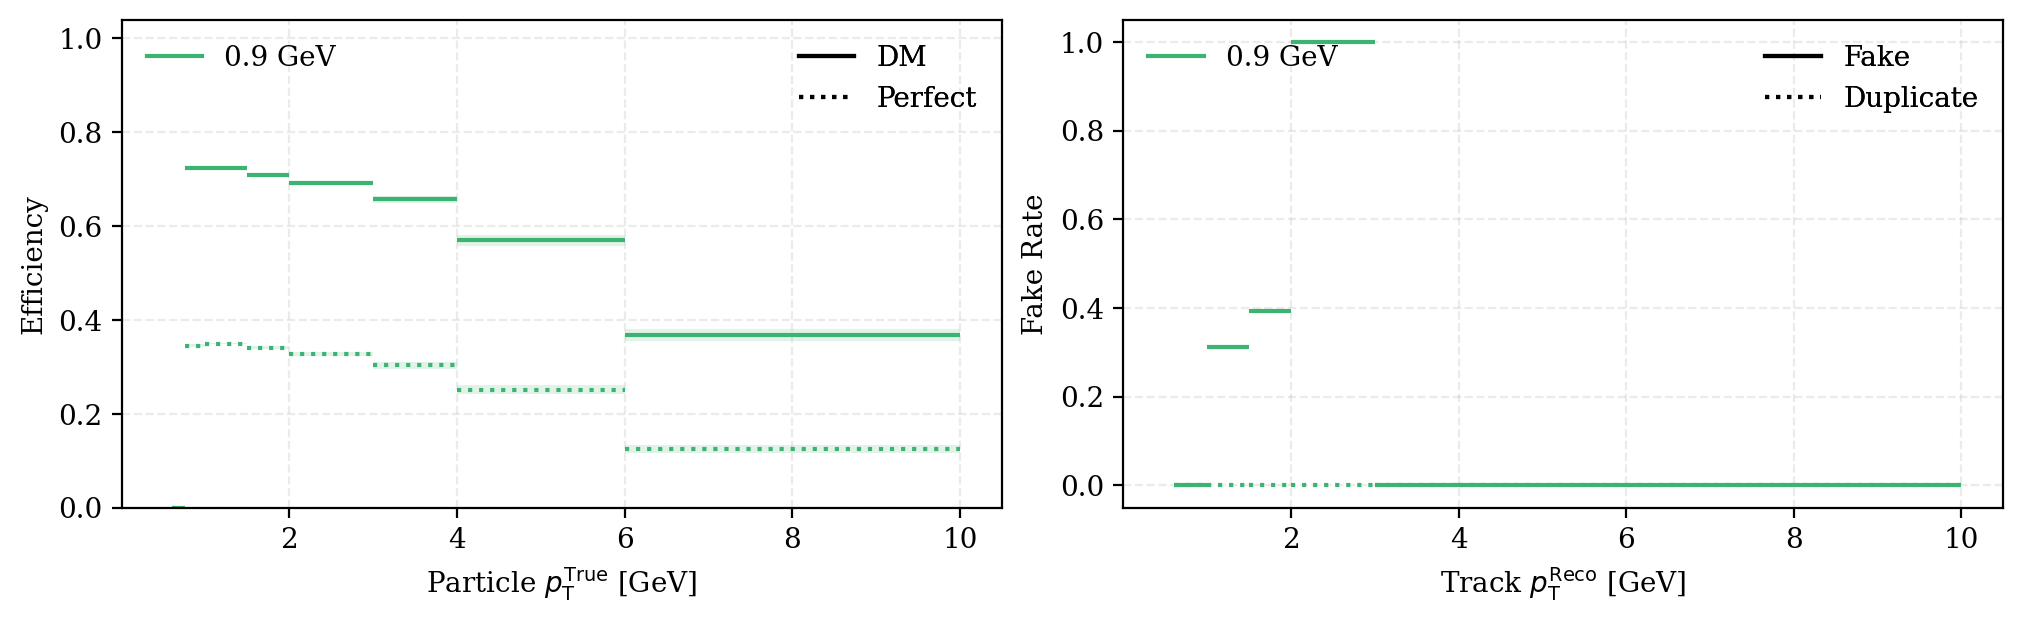

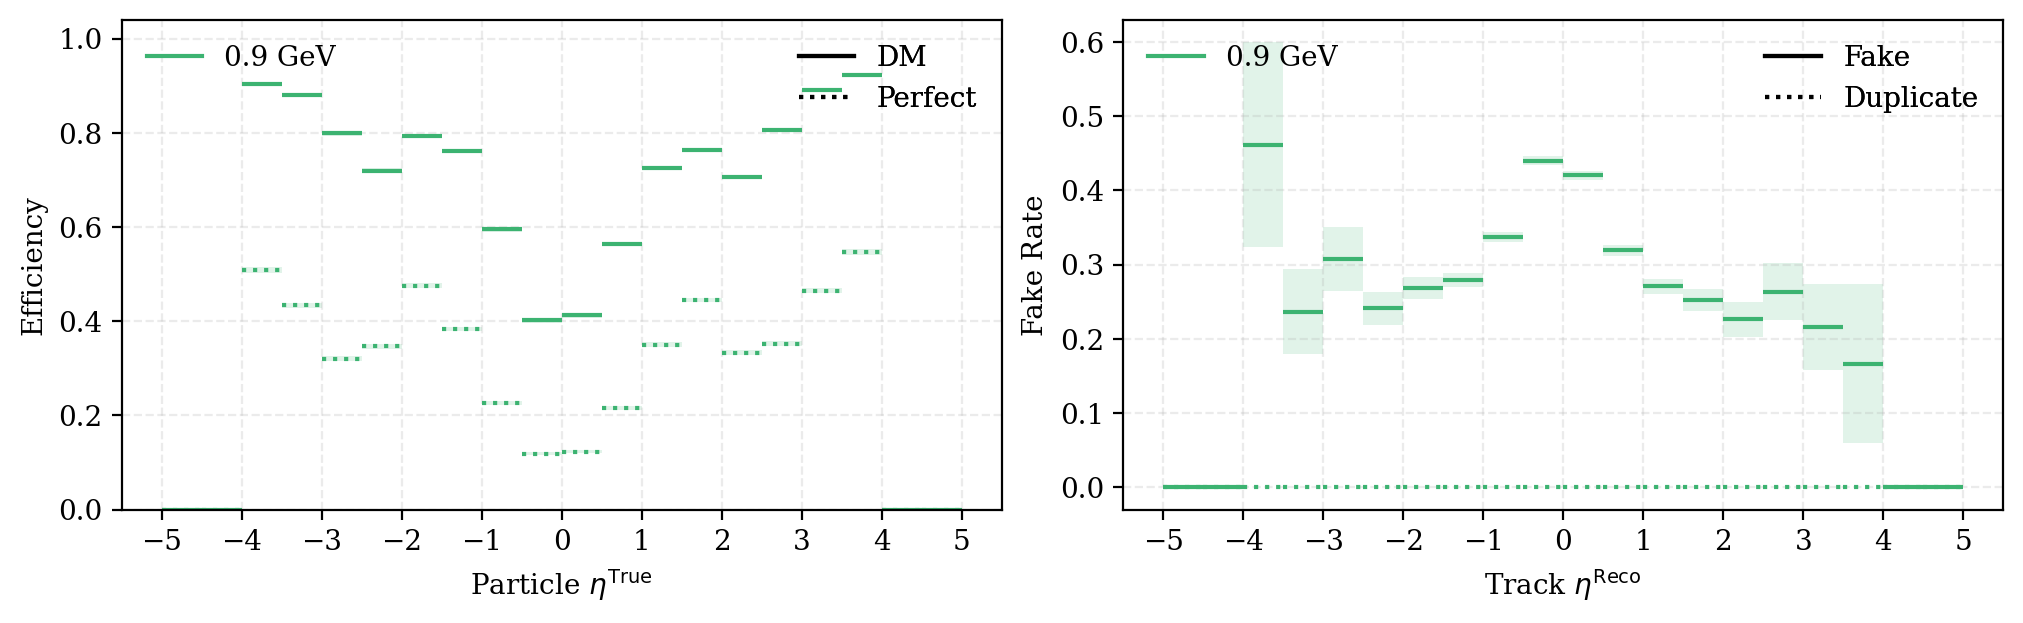

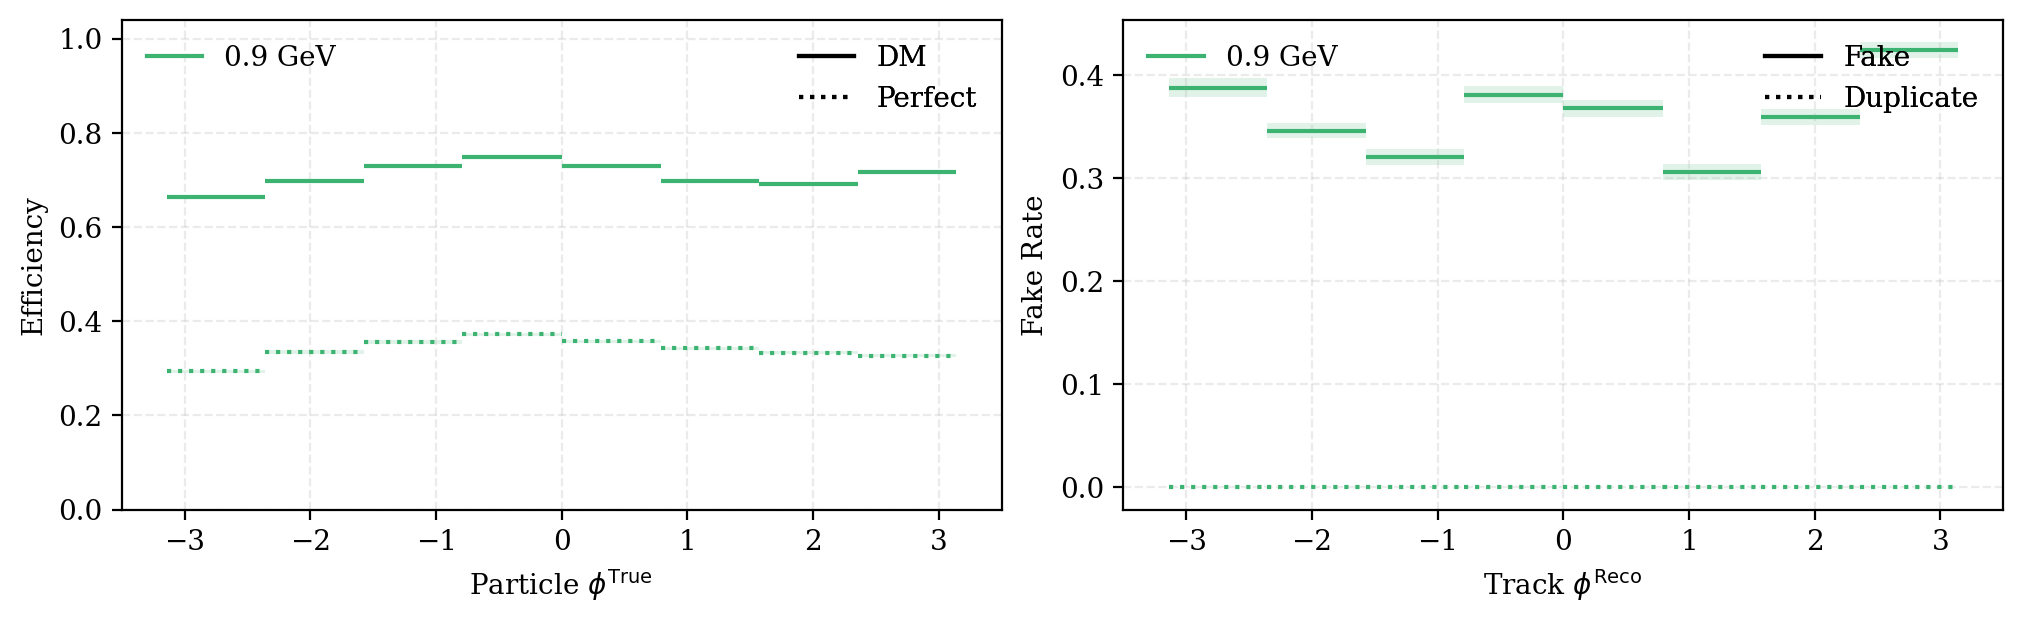

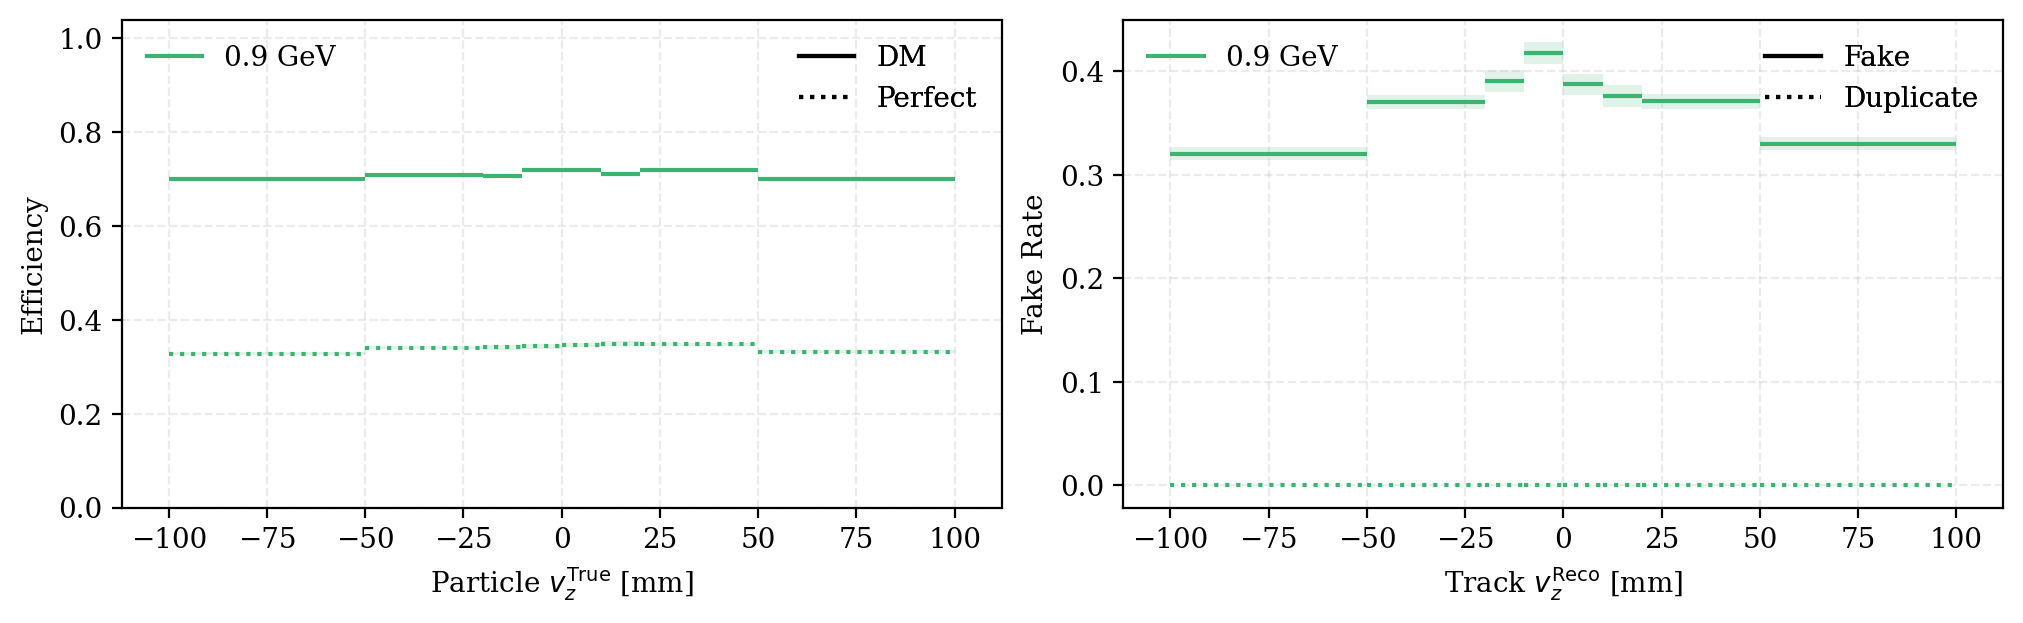

In [13]:
for qty in ["pt", "eta", "phi", "vz"] : 
    fig, ax = plt.subplots(ncols=2, figsize=(10,3), constrained_layout=True)
    for name, (tracks, parts) in tracking_results.items():
        """Efficiency plots"""
        reconstructable = parts["reconstructable"]
        # double majority
        bin_count, bin_error = binned(tracks["eff_dm"][reconstructable], parts["particle_"+qty][reconstructable], qty_bins[qty], underflow=True, overflow=True, binomial=False)
        profile_plot(bin_count, bin_error, qty_bins[qty], axes=ax[0], color=training_colours["0.9 GeV"], ls="solid")
        # perfect
        bin_count, bin_error = binned(tracks["eff_perfect"][reconstructable], parts["particle_"+qty][reconstructable], qty_bins[qty], underflow=True, overflow=True, binomial=False)
        profile_plot(bin_count, bin_error, qty_bins[qty], axes=ax[0], color=training_colours["0.9 GeV"], ls="dotted")
        """Fake rate plots"""
        reconstructable = tracks["reconstructable"]
        # fake rate
        fakes = (~tracks["eff_dm"]) & (~tracks["duplicate"])
        bin_count, bin_error = binned(fakes[reconstructable], tracks["track_"+qty][reconstructable], qty_bins[qty], underflow=True, overflow=True, binomial=False)
        profile_plot(bin_count, bin_error, qty_bins[qty], axes=ax[1], color=training_colours["0.9 GeV"], ls="solid")
        # duplicate
        bin_count, bin_error = binned(tracks["duplicate"][reconstructable], tracks["track_"+qty][reconstructable], qty_bins[qty], underflow=True, overflow=True, binomial=False)
        profile_plot(bin_count, bin_error, qty_bins[qty], axes=ax[1], color=training_colours["0.9 GeV"], ls="dotted")
    
    # custom legends
    legend_elements_0 = [Line2D([0], [0], color=training_colours[training], label=training) for training in tracking_results]
    #legend_elements_1 = [Line2D([0], [0], color=training_colours[training], label=training) for training in tracking_results]
    leg1_0 = ax[0].legend(handles=legend_elements_0, frameon=False, loc="upper left")
    ax[0].add_artist(leg1_0)
    leg1_1 = ax[1].legend(handles=legend_elements_0, frameon=False, loc="upper left")
    ax[1].add_artist(leg1_1)
    legend_elements_eff = [Line2D([0], [0], color="black", label="DM"), Line2D([0], [0], color="black", ls="dotted", label="Perfect")]
    leg2_0 = ax[0].legend(handles=legend_elements_eff, frameon=False, loc="upper right")
    ax[0].add_artist(leg2_0)
    legend_elements_fake = [Line2D([0], [0], color="black", label="Fake"), Line2D([0], [0], color="black", ls="dotted", label="Duplicate")]
    leg2_1 = ax[1].legend(handles=legend_elements_fake, frameon=False, loc="upper right")
    ax[1].add_artist(leg2_1)

    # axis range and label
    ax[0].set_ylim(0, 1.04)
    for i in range(2):
        ax[i].set_xlabel(rf"Particle ${qty_symbols[qty]}^\mathrm{{True}}$ {qty_units[qty]}")
        ax[i].grid(zorder=0, alpha=0.25, linestyle="--")
        if qty == "pt":
            ax[i].set_xlim([0, 10.5])
            ax[i].set_xticks(np.arange(start=2, stop=11, step=2))
            #ax[1].set_ylim(0.0, 0.03)
        if qty == "eta":
            ax[i].set_xlim([-5.5, 5.5])
            ax[i].set_xticks(np.arange(start=-5, stop=5.5, step=1))
            
        if qty == "phi":
            ax[i].set_xlim([-3.5, 3.5])
            ax[i].set_xticks(np.arange(start=-3, stop=3.5, step=1))
            #ax[1].set_ylim(0.0, 0.02)
        if qty == "vz":
            ax[i].set_xlim([-112, 112])
            ax[i].set_xticks(np.arange(start=-100, stop=110, step=25))
            #ax[1].set_ylim(0.0, 0.02)
            
    ax[0].set_xlabel(rf"Particle ${qty_symbols[qty]}^\mathrm{{True}}$ {qty_units[qty]}")
    ax[0].set_ylabel("Efficiency")

    ax[1].set_xlabel(rf"Track ${qty_symbols[qty]}^\mathrm{{Reco}}$ {qty_units[qty]}")
    ax[1].set_ylabel("Fake Rate")
    
    plt.show()

## Regression residual plots

## `placeholder for regression residual plots`